<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Course3/Practice/Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import l1,l2
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-12-29 16:25:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-12-29 16:25:07 (156 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [20]:
max_sequence_len

11

In [31]:
model = Sequential()
model.add(Embedding(total_words, 256, input_length=max_sequence_len - 1))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dense(128, kernel_regularizer="l2", activation="relu"))
model.add(Dense(total_words, activation="softmax"))
# Pick an optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 10, 256)           822016    
_________________________________________________________________
lstm_24 (LSTM)               (None, 10, 256)           525312    
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 256)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 3211)              414219    
Total params: 1,975,179
Trainable params: 1,975,179
Non-trainable params: 0
___________________________________________

In [32]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 9s 13ms/step - loss: 7.5086 - accuracy: 0.0203
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.5466 - accuracy: 0.0213
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4399 - accuracy: 0.0212
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3695 - accuracy: 0.0233
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3401 - accuracy: 0.0221
Epoch 6/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2788 - accuracy: 0.0274
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1880 - accuracy: 0.0335
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1325 - accuracy: 0.0363
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0183 - accuracy: 0.0417
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 5.975

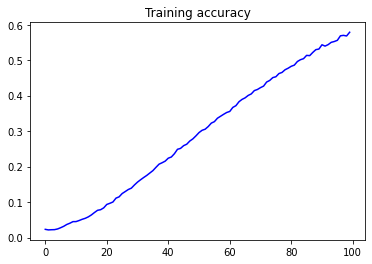

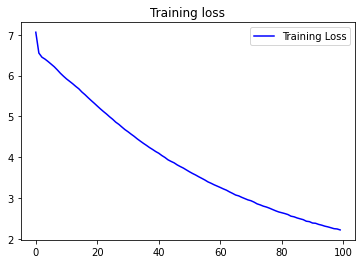

In [33]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [34]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope with their sit taken ' near esteem'd gone another decay show show good plea unknown heir end foes chary taken commits crime look'd of thief re pain lies come where set men's sight sight made night kiss pain show their face delight prove men end dead near keep men speed win find men undivided thief approve go on his prepare morrow cause of thy face delight must come gone back away their pain thee thee thee be old part more so bright by wrongs strange mother down appear end care there go some mad kind set decay end men night
